In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
baseline_200 = pd.read_csv('./input/output_results_200_baseline.csv')
exp_100x2 = pd.read_csv('./input/output_results_100x2.csv')
exp_50x4 = pd.read_csv('./input/output_results_50x4.csv')
baseline_500 = pd.read_csv('./input/output_results_500_baseline.csv')
exp_100x5 = pd.read_csv('./input/output_results_100x5.csv')
exp_250x2 = pd.read_csv('./input/output_results_250x2.csv')

In [4]:
# add train volume to the dfs
baseline_200['train_size'] = baseline_200.round_id * 200
exp_100x2['train_size'] = exp_100x2.round_id * 100
exp_50x4['train_size'] = exp_50x4.round_id * 50

In [70]:
def plot_score_by_tag(score_df, yaxis, title, tag_col='tag_name', xaxis='round_id'):
    plt.figure(figsize=(10, 8))
    for tag_name in score_df[tag_col].unique():
        plot_df = score_df.loc[score_df[tag_col] == tag_name, :]
        plt.plot(xaxis, yaxis, data=plot_df, label=tag_name, marker='*')
    #plt.ylim(0.3, 1)
    xticks = [i+1 for i in list(range(score_df[xaxis].max()))]
    plt.xticks(xticks)
    plt.xlabel(xaxis.upper())
    plt.ylabel('Score')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.ylim((0.2, 1))
    plt.show()
    plt.close()

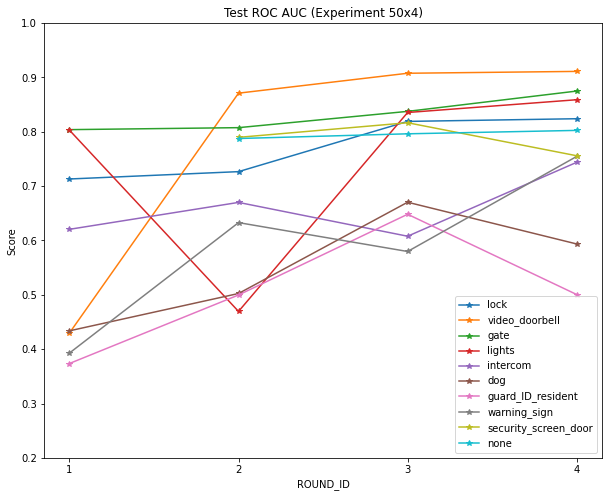

In [71]:
plot_score_by_tag(exp_50x4, 'test_roc_auc', 'Test ROC AUC (Experiment 50x4)')

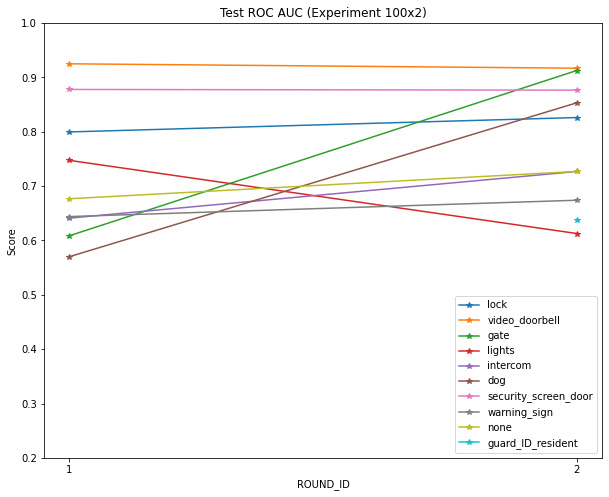

In [72]:
plot_score_by_tag(exp_100x2, 'test_roc_auc', 'Test ROC AUC (Experiment 100x2)')

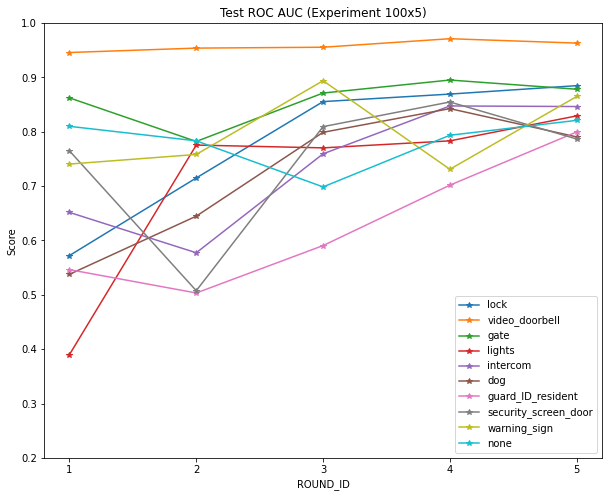

In [74]:
plot_score_by_tag(exp_100x5, 'test_roc_auc', 'Test ROC AUC (Experiment 100x5)')

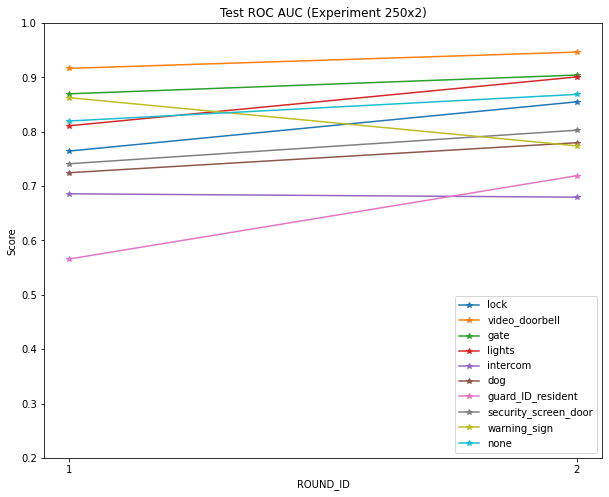

In [76]:
plot_score_by_tag(exp_250x2, 'test_roc_auc', 'Test ROC AUC (Experiment 250x2)')